In [234]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
## Use the ggplot style
plt.style.use('ggplot')

# Spatial Analyses for two spatial process
# Case Study: Presence of Abies given a Conifer sample

The study is presented in the East-central region of Mexico (Puebla). The landscape includes ocean to the east (Gulf of Mexico), sharp mountain ridges, with plateau to the west. An orographic shadow is present giving a great diversity of ecosystems 
types.


## Data Used
The data extraction has been made with Biospytial. The methods for this are explained in: [here](/DataExtraction/[D.E]Cell Extractor.ipynb)

We have two different datasets. 
* Training Data Set
    
    * 't-puebla-p9-abies-pinophyta'
* Predictor Data Set
    * 'p-100x100-puebla-poly9'

![alt text](puebla-poly9.png)    
Each name corresponds to a DataFrame stored in the Redis Instance
To Read the data from here do:


In [235]:
import external_plugins.spystats.biospytial_models.runner as bm
import redis
conn = redis.StrictRedis(host='redis',password='biospytial.')
trainkey = 't-puebla-p9-abies-pinophyta'
predkey = 'p-100x100-puebla-poly9'
PDF = bm.preparePredictors(bm.loadDataFrameFromRedis(predkey,conn))
TDF = bm.loadDataFrameFromRedis(trainkey,conn)

INFO:external_plugins.spystats.biospytial_models.runner:Loading data from RedisDB
INFO:external_plugins.spystats.biospytial_models.runner:Loading data from RedisDB


In [236]:
TDF = TDF.replace('N.A.',np.nan)
## Change to categorical variables
## Associate the categorical variables
TDF['name'] = TDF['name'].astype('category')
TDF['wwf_mhtnam'] = TDF['wwf_mhtnam'].astype('category')
TDF['tipos'] = TDF['tipos'].astype('category')

PDF['clean']['name'] = PDF['clean']['name'].astype('category')
PDF['clean']['wwf_mhtnam'] = PDF['clean']['wwf_mhtnam'].astype('category')
PDF['clean']['tipos'] = PDF['clean']['tipos'].astype('category')

PDF['full']['name'] = PDF['full']['name'].astype('category')
PDF['full']['wwf_mhtnam'] = PDF['full']['wwf_mhtnam'].astype('category')
PDF['full']['tipos'] = PDF['full']['tipos'].astype('category')


/opt/conda/envs/biospytial/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/envs/biospytial/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/biospytial/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [237]:
TDF.describe()

,Pinophyta,Abies,LUCA,cell_ids,Dist.to.road_m,Elevation_m,MaxTemp_m,MeanTemp_m,MinTemp_m,Population_m,Precipitation_m,SolarRadiation_m,VaporPres_m,WindSp_m,Longitude,Latitude,wwf_mhtnum,cov_id
count,4061.000000,4061.000000,4061.000000,4061.000000,4049.000000,4048.000000,4054.000000,4047.000000,4047.000000,4055.000000,4054.000000,4054.000000,4047.000000,4047.000000,4061.000000,4061.000000,4056.000000,4017.000000
mean,0.083969,0.013051,0.819995,244672.622999,3259.278448,1343.124104,26.142437,19.748716,26.184566,258.099703,100.751641,17152.661220,1.678036,2.162103,-97.586618,19.239974,3.875493,9573.529749
std,0.277376,0.113507,0.384239,5131.928365,2549.362551,986.470000,4.279515,4.652069,4.278233,1128.499396,54.350508,778.711765,0.629911,0.463946,0.870605,0.976992,4.371190,1082.458385
min,0.000000,0.000000,0.000000,233546.000000,0.000000,-25.888889,10.945833,5.250000,11.006944,0.201695,27.319444,15519.268519,0.245370,1.250000,-99.219563,17.498390,1.000000,7291.000000
25%,0.000000,0.000000,1.000000,240695.000000,1370.582114,234.194444,22.805764,15.527778,22.853241,20.400491,57.682639,16462.820486,1.000000,2.000000,-98.288563,18.429390,1.000000,8684.000000
50%,0.000000,0.000000,1.000000,244897.000000,2359.661934,1407.944444,26.845370,20.743056,26.872685,48.058399,86.829861,17198.759259,1.537037,2.000000,-97.602563,19.164390,2.000000,9723.000000
75%,0.000000,0.000000,1.000000,248774.000000,4387.122334,2244.361111,29.818634,23.981019,29.847524,113.994252,129.877894,17761.225764,2.421296,2.273148,-96.965563,19.997390,3.000000,10536.000000
max,1.000000,1.000000,1.000000,254343.000000,19857.920539,4474.888889,33.485667,26.289352,33.580000,16464.841919,380.518519,19059.960648,2.583333,5.199074,-95.397563,21.472482,14.000000,11405.000000


## Descriptive statistics
Pairplot and Correlogram

In [238]:
import seaborn as sb

In [239]:
covs = TDF[['Pinophyta','Abies','Dist.to.road_m','Elevation_m','MaxTemp_m','MeanTemp_m','MinTemp_m','Population_m',  u'Precipitation_m','SolarRadiation_m','VaporPres_m','WindSp_m']]


In [240]:
corr = covs.corr()

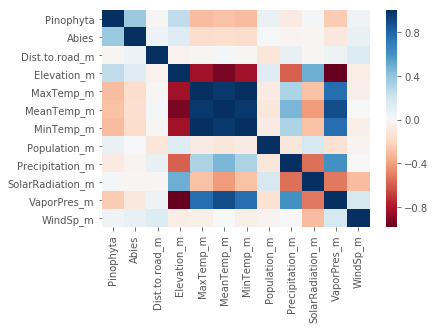

In [241]:
sb.heatmap(corr,cmap=plt.cm.RdBu)

In [242]:
## Load Adjacency matrix
mat_filename = "/outputs/training_data_sample_puebla_p9_abies_pinophyta_adjmat.npy"
M = np.load(mat_filename)

In [243]:
#formula_S = 'Burseraceae ~ Longitude + Latitude + Elevation_m + MaxTemp_m + MeanTemp_m + SolarRadiation_m + VaporPres_m '
formula_S= 'Pinophyta ~ Longitude + Latitude + Q("Dist.to.road_m") + Population_m  ' #+ tipos'
formula_P = 'Abies ~  Longitude + Latitude + Elevation_m + MeanTemp_m  '

In [244]:
TM_S,PM_S = bm.splitByFormula(formula_S,TDF,PDF['clean'])
TM_P,PM_P = bm.splitByFormula(formula_P,TDF,PDF['clean'])

INFO:external_plugins.spystats.biospytial_models.runner:Creating Design matrices from the formula Pinophyta ~ Longitude + Latitude + Q("Dist.to.road_m") + Population_m  
INFO:external_plugins.spystats.biospytial_models.runner:Creating Design matrices from the formula Abies ~  Longitude + Latitude + Elevation_m + MeanTemp_m  


In [287]:
# Bring upon the pickled graph

tag = 't-puebla-p9-abies-pinophyta-graph'
G = pickle.loads(conn.get(tag))

In [288]:
# Visualize the graph

In [290]:
## Identify NaN nodes in covariates and remove them from the graph
N = TM_S[1].shape[0]
idx = set(TM_S[1].index)
nodata_idx = filter(lambda x : x not in idx, range(N))
nodes_2b_removed = list(TDF.iloc[nodata_idx].cell_ids)
G.remove_nodes_from(nodes_2b_removed)


In [295]:
#Order the nodes according to their id value, just ot mke it expl
ordered_nodes_list = G.nodes()
#ordered_nodes_list.sort(key=lambda c : c.id)
ordered_nodes_list.sort()
M = nx.adjacency_matrix(G,nodelist=ordered_nodes_list)
M.shape

(4049, 4049)

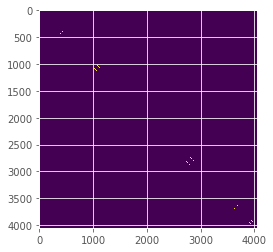

In [294]:
plt.imshow(M.toarray())

In [296]:
### Finally, let's see how this thing works

In [297]:
import pymc3 as pm
import theano.tensor as tt
import theano

In [298]:

from pymc3.distributions import distribution
import scipy

class Sparse_CAR(distribution.Continuous):
    """
    Sparse Conditional Autoregressive (CAR) distribution

    Parameters
    ----------
    alpha : spatial smoothing term
    W : adjacency matrix
    tau : precision at each location
    """

    def __init__(self, alpha, W, tau, *args, **kwargs):
        self.alpha = alpha = tt.as_tensor_variable(alpha)
        self.tau = tau = tt.as_tensor_variable(tau)
        D = W.sum(axis=0)
        n, m = W.shape
        self.n = n
        self.median = self.mode = self.mean = 0
        super(Sparse_CAR, self).__init__(*args, **kwargs)

        # eigenvalues of D^−1/2 * W * D^−1/2
        Dinv_sqrt = np.diag(1 / np.sqrt(D))
        DWD = np.matmul(np.matmul(Dinv_sqrt, W), Dinv_sqrt)
        self.lam = scipy.linalg.eigvalsh(DWD)

        # sparse representation of W
        w_sparse = scipy.sparse.csr_matrix(W)
        self.W = theano.sparse.as_sparse_variable(w_sparse)
        self.D = tt.as_tensor_variable(D)

        # Presicion Matrix (inverse of Covariance matrix)
        # d_sparse = scipy.sparse.csr_matrix(np.diag(D))
        # self.D = theano.sparse.as_sparse_variable(d_sparse)
        # self.Phi = self.tau * (self.D - self.alpha*self.W)

    def logp(self, x):
        logtau = self.n * tt.log(tau)
        logdet = tt.log(1 - self.alpha * self.lam).sum()

        # tau * ((phi .* D_sparse)' * phi - alpha * (phit_W * phi))
        Wx = theano.sparse.dot(self.W, x)
        tau_dot_x = self.D * x.T - self.alpha * Wx.ravel()
        logquad = self.tau * tt.dot(x.ravel(), tau_dot_x.ravel())

        # logquad = tt.dot(x.T, theano.sparse.dot(self.Phi, x)).sum()
        return 0.5*(logtau + logdet - logquad)



In [299]:
import pymc3 as pm

In [306]:

W = M.toarray()
X = TM_S[1].iloc[:,[0,3,4]].values
O = TM_S[0].values
N = len(TM_S[1])
with pm.Model() as model4:
    # Vague prior on intercept and effect
    beta = pm.Normal('beta', mu=0.0, tau=1.0, shape=(3, 1))
    # Priors for spatial random effects
    tau = pm.Gamma('tau', alpha=2., beta=2.)
    alpha = pm.Uniform('alpha', lower=0, upper=1)
    phi = Sparse_CAR('phi', alpha, W, tau, shape=(N, 1))

    # Mean model
    mu = pm.Deterministic('mu', pm.math.invlogit(tt.dot(X, beta) + phi ))

    # Likelihood
    Yi = pm.Bernoulli('Yi', p=mu.ravel(), observed=O)

    trace4 = pm.sample(tune=1000)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [phi, alpha_interval__, tau_log__, beta]
INFO:pymc3:NUTS: [phi, alpha_interval__, tau_log__, beta]


IOError: [Errno 28] No space left on device

In [67]:
import theano as tt

In [ ]:
tt.inv

In [12]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('Pinophyta ~ Q("Dist.to.road_m") +  Population_m + tipos',TDF,family=pm.glm.families.Binomial())
    trace = pm.sample(1000,tune=500,init='adapt_diag')

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Population_m, Q("Dist.to.road_m"), tipos[T.Zona Urbana], tipos[T.Vegetacion de Dunas Costeras], tipos[T.Vegetacion Halofila], tipos[T.Vegetacion Acuatica], tipos[T.Selva Baja Caducifolia], tipos[T.Selva Alta Subperennifolia], tipos[T.Selva Alta Perennifolia], tipos[T.Pradera de Alta Montana], tipos[T.Pastizal Halofilo], tipos[T.Pastizal Cultivado], tipos[T.Palmar], tipos[T.NaN], tipos[T.Matorral Subtropical], tipos[T.Matorral Submontano], tipos[T.Matorral Desertico Rosetofilo], tipos[T.Matorral Crasicaule], tipos[T.Manglar], tipos[T.Cuerpos de Agua],

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25f12df1d0>,
      dtype=object)

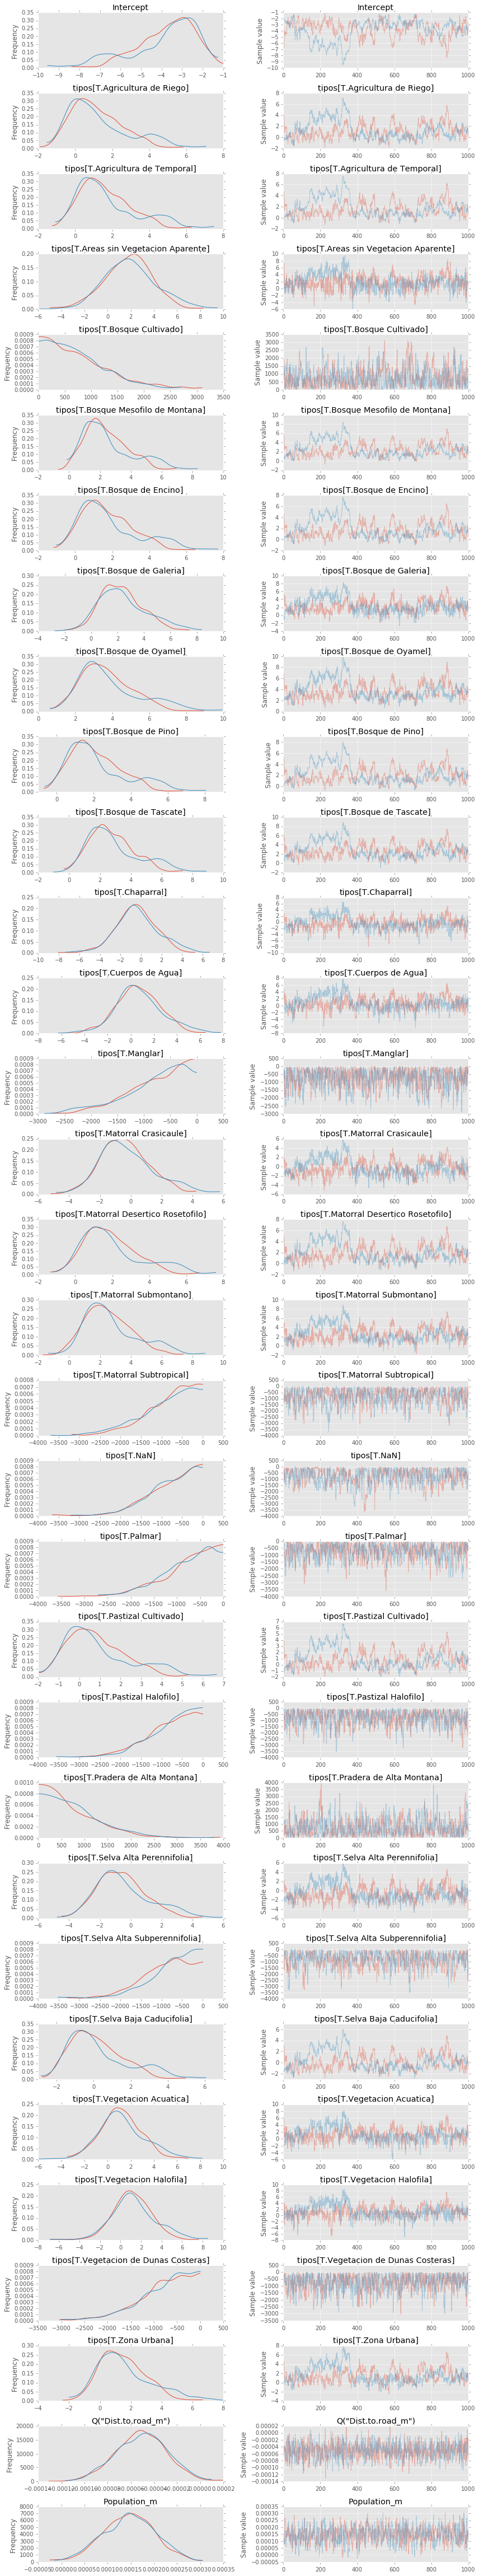

In [13]:
pm.traceplot(trace)

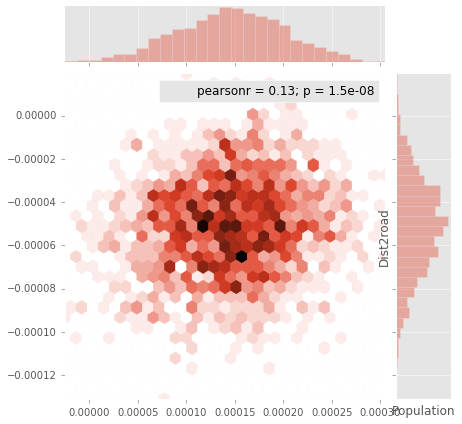

In [14]:
sb.jointplot(trace['Population_m'],trace['Q("Dist.to.road_m")'],kind="hex")
plt.xlabel("Population")
plt.ylabel("Dist2road")

In [84]:
trace_df = pm.trace_to_dataframe(trace)
cred_int = lambda s : (s.quantile(0.25),s.mean(),s.quantile(0.975))
cocha = map(lambda col : cred_int(trace_df[col]),trace_df.columns)
cred_ints = pd.DataFrame(cocha,columns=['q0_25','mean','q_975'])
cred_ints.set_index(trace_df.columns,inplace=True)
#cred_ints.sort('mean')

In [86]:
## Significants
ok = lambda row : not( row.q0_25 < 0.0 and row.q_975 > 0.0) 
significant = cred_ints[cred_ints.apply(ok,axis=1)]
significant

,q0_25,mean,q_975
tipos[T.Bosque de Galeria],1.120975,2.350869,6.295058
tipos[T.Agricultura de Temporal],0.544862,1.664155,5.204504
tipos[T.Palmar],-1083.611114,-766.922610,-29.474737
tipos[T.Bosque de Oyamel],2.663148,3.780851,7.458525
tipos[T.Vegetacion de Dunas Costeras],-1094.484081,-772.189278,-30.605283
tipos[T.Matorral Submontano],1.429651,2.606782,6.306508
tipos[T.Bosque de Pino],1.022433,2.151938,5.756082
Intercept,-4.683927,-3.815277,-1.643235
tipos[T.Bosque de Tascate],1.653756,2.806705,6.386595
tipos[T.Agricultura de Riego],0.079073,1.218828,4.799467


In [48]:
## Presences analysis
formula = 'Abies ~ Elevation_m + MeanTemp_m'
with pm.Model() as model2:
    pm.glm.GLM.from_formula(formula,TDF,family=pm.glm.families.Binomial())
    trace_abies = pm.sample(1000,tune=500,init='adapt_diag')


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [MeanTemp_m, Elevation_m, Intercept]
INFO:pymc3:NUTS: [MeanTemp_m, Elevation_m, Intercept]
100%|██████████| 1500/1500 [04:11<00:00,  5.96it/s]
The acceptance probability does not match the target. It is 0.8823717145291046, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8798673138380964, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25c9dd1890>,
      dtype=object)

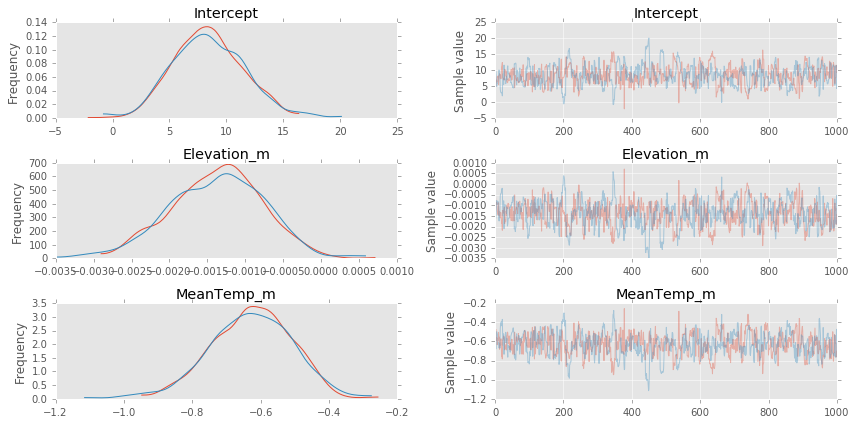

In [50]:
pm.traceplot(trace_abies)

In [51]:
#sb.jointplot(trace_abies['Population_m'],trace_abies['Q("Dist.to.road_m")'],kind="hex")
#plt.xlabel("Population")
#plt.ylabel("Dist2road")

In [59]:
trace_df2 = pm.trace_to_dataframe(trace_abies)
cred_int = lambda s : (s.quantile(0.25),s.mean(),s.quantile(0.975))
cocha = map(lambda col : cred_int(trace_df2[col]),trace_df2.columns)
cred_ints = pd.DataFrame(cocha,columns=['q0_25','mean','q_975'])
cred_ints.set_index(trace_df2.columns,inplace=True)
cred_ints.sort('mean')

/opt/conda/envs/biospytial/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,q0_25,mean,q_975
MeanTemp_m,-0.709450,-0.628746,-0.418037
Elevation_m,-0.001792,-0.001380,-0.000286
Intercept,6.267059,8.384302,14.295675


In [81]:
ok = lambda row : not( row.q0_25 < 0.0 and row.q_975 > 0.0) 
significant = cred_ints[cred_ints.apply(ok,axis=1)]
significant

,q0_25,mean,q_975
Intercept,6.267059,8.384302,14.295675
Elevation_m,-0.001792,-0.001380,-0.000286
MeanTemp_m,-0.709450,-0.628746,-0.418037


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f25c7a67f50>,
      dtype=object)

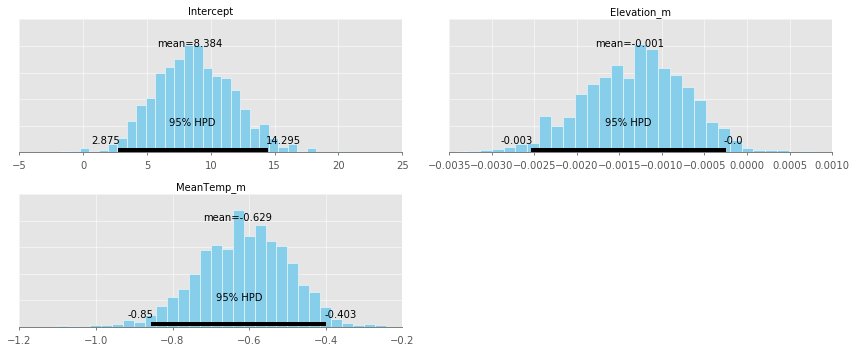

In [87]:
pm.plot_posterior(trace_abies)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f25c71cd5d0>,
      dtype=object)

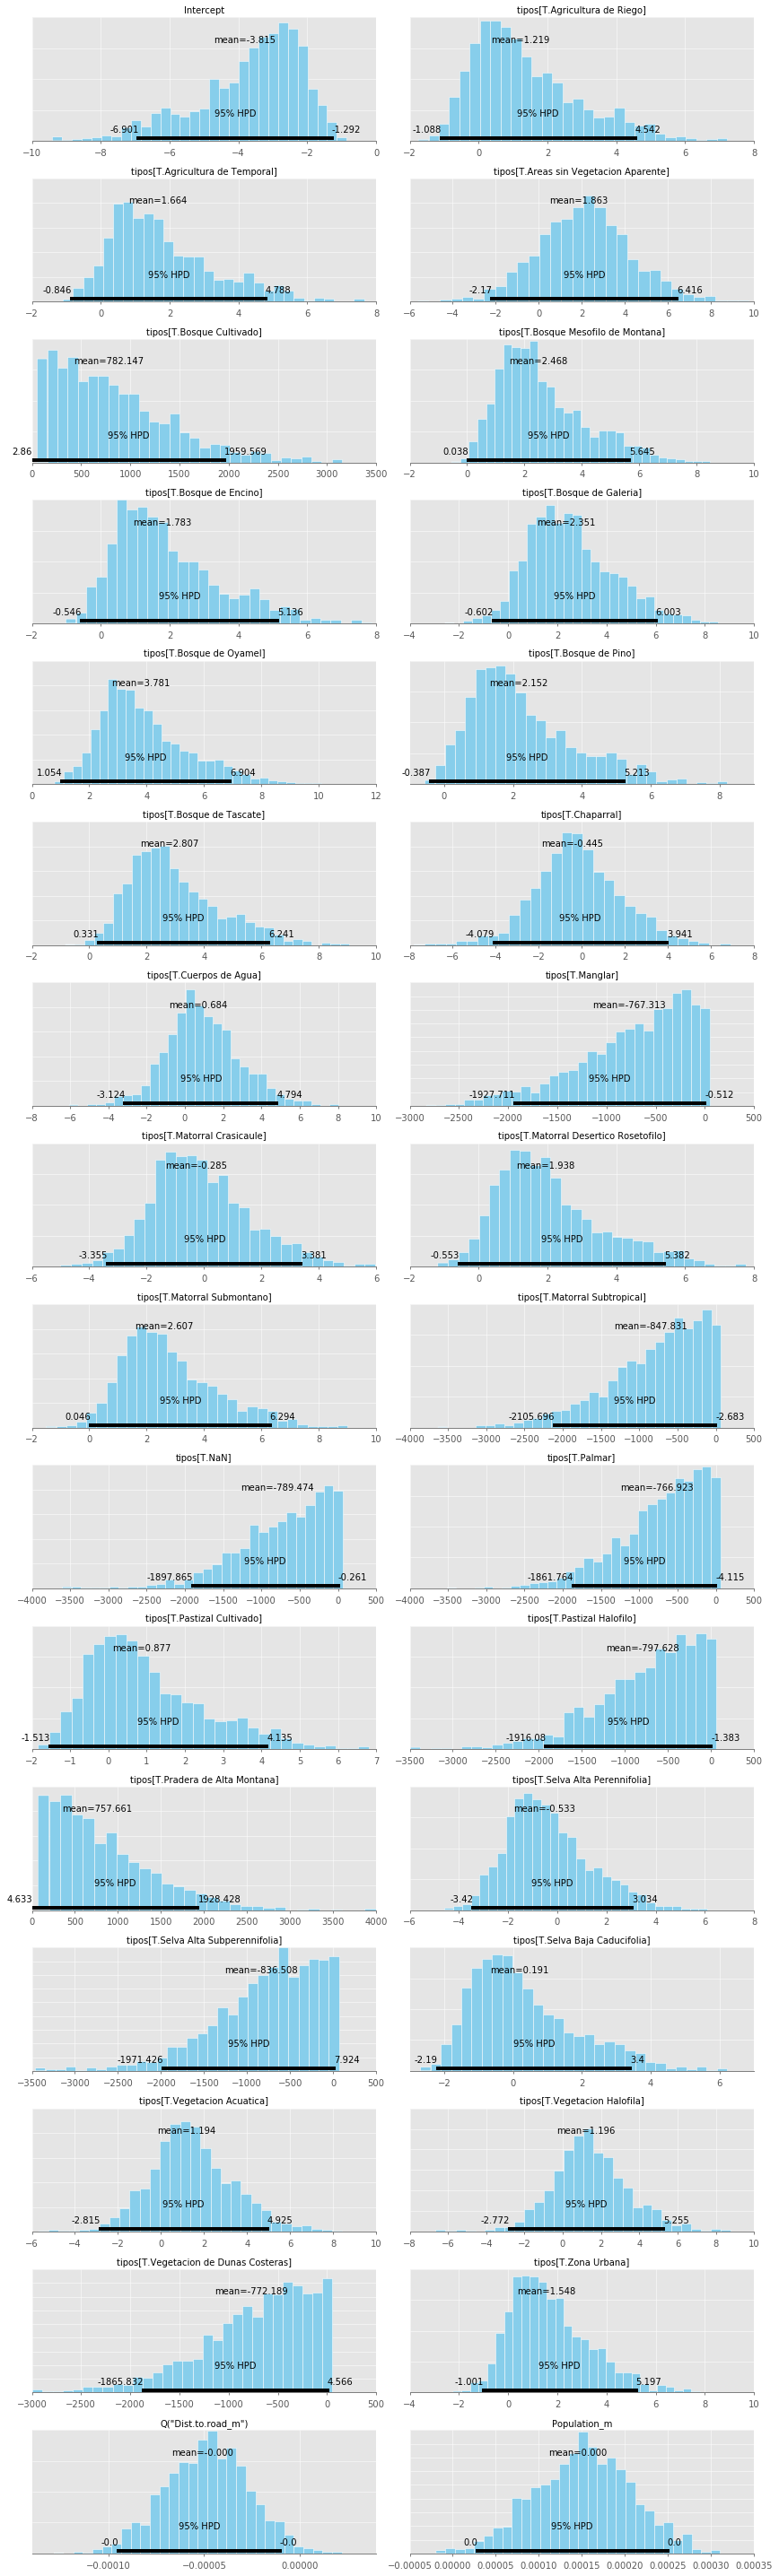

In [88]:
pm.plot_posterior(trace)